# Trapezoidal rule


Assume $\{x_{0},x_{1}\} \in [a,b]$, for some values of $a$ and $b$, are known and we are interested in calculating the area under the curve for a function of $f(x)$ which is unknown, but we have access to the value of $f(x_{0})$ and $f(x_{1})$. Then,

\begin{align*}
\int_{a}^{b}f(x)\,dx\approx \frac {\left(x_{1} - x_{0}\right)}{2} \left(f(x_{0})+f(x_{1})\right).
\end{align*}

<center>
<iframe src="https://www.geogebra.org/classic/bjrdnu5q?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>
</center>

Moreover, in case, we use $\{x_{0},x_{1}, x_{2}\}$ and $\{f(x_{0}),f(x_{1}), f(x_{2})\}$,
\begin{align*}
\int_{a}^{b}f(x)\,dx\approx
\frac {\left(x_{1} - x_{0}\right)}{2} \left(f(x_{0})+f(x_{1})\right)+
\frac {\left(x_{2} - x_{1}\right)}{2} \left(f(x_{1})+f(x_{2})\right)
.
\end{align*}

<iframe src="https://www.geogebra.org/classic/dcszuqsv?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Assume that $\{x_{0},x_{1},\ldots, x_{N}\}$ are $N+1$ in $[a,b]$ such that
\begin{align*}
a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b,
\end{align*}
and $\Delta x_{n}$ is defined as $\Delta x_{n}=x_{n}-x_{n-1}$. Then,
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx \frac {1}{2}\sum _{n=1}^{N}\left(f(x_{n-1})+f(x_{n})\right)\Delta x_{n}.
\end{align*}
Now if  $\{x_{0},x_{1},\ldots, x_{N}\}$ are equally distanced. i.e. $\Delta x_{n}= h = \dfrac{b-a}{N}>0$ for $n\in \{0,1,\ldots,N\}$,
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx \frac {h}{2}\sum _{n=1}^{N} \left(f(x_{n-1})+f(x_{n})\right),
\end{align*}
or
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx 
{\frac {h}{2}}\left(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+2f(x_{4})+\cdots +2f(x_{N-1})+f(x_{N})\right).
\end{align*}

`````{admonition} Remark
:class: tip
The term numerical quadrature is often used for numerical integration!
`````

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Trapz(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    T : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Trapezoidal rule

    '''
    
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    # discretizing function f on [a,b]
    fn = f(x)
    # the increment \delta x
    h = (b - a) / N
    # Trapezoidal rule
    T = (h/2) * np.sum(fn[1:] + fn[:-1])
    return T
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [T] = Trapz(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
T : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Trapezoidal rule

%}
% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
fn = f(x);
% the increment \delta x
h = (b - a) / N;
% Trapezoidal rule
T = (h/2) * np.sum(fn(1:N) + fn(1:N-1));
```
:::

::::

<font color='Blue'><b>Example</b></font>: Use the Trapezoid rule and compute
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx,
\end{align*}
when
* **a)** $N = 10$,
* **b)** $N = 20$.

<font color='Green'><b>Solution</b></font>: We have,

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
# This function would be useful for demonstrating Trapz method
def TrapzPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue', Font = False):
    fontsize = 14
    Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
    Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
    plt.rcParams.update(Fig_Params)

    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    _ = ax.plot(X,Y)
    for i in range(N):
        ax.fill([x[i], x[i], x[i+1], x[i+1]], [0, f(x[i]), f(x[i+1]), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
    if Font:
        _ = ax.set_title('Trapezoid Rule (N = %i)' % N, fontproperties = Font, fontsize = 14)
    else:    
        _ = ax.set_title('Trapezoid Rule (N = %i)' % N, fontsize = 14)
    _ = ax.set_xlim([min(x), max(x)])
    _ = ax.set_ylim([0, max(y)])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

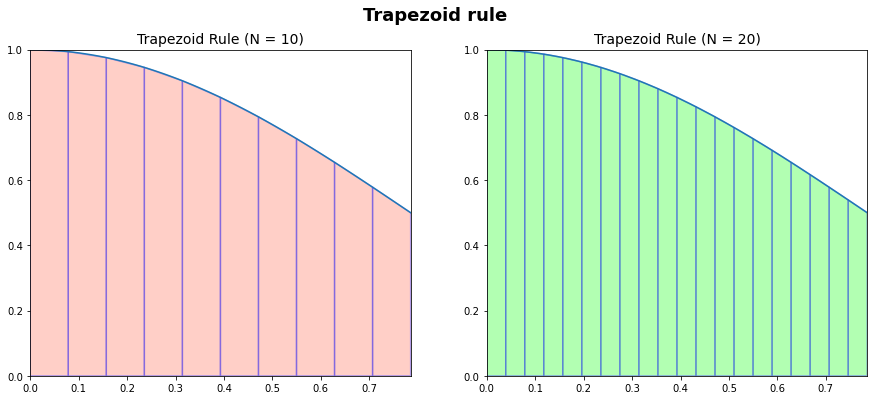

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Trapz  
    
f = lambda x : np.cos(x)**2
a = 0
b = np.pi/4
N = [10, 20]
#
fig, ax = plt.subplots(nrows=1, ncols=len(N), figsize=(15, 6))
ax = ax.ravel()
Colors = ['Tomato', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle('Trapezoid rule', fontproperties=font, fontsize = 18)
for i in range(len(ax)):
    int_text = '\\int_{0}^{\\pi/4} \cos^2(x)\\, dx ='
    TrapzPlots(f= f, a = a, b= b, N = N[i], ax = ax[i], CL = Colors[i])
    Int_trapz = Trapz(f= f, a = a, b= b, N = N[i])
    display(Latex(int_text + '''\\frac {h}{2}\\sum _{n=1}^{%i} \\left(f(x_{n-1})+f(x_{n})\\right) = %.4e''' % (N[i], Int_trapz)))
    del Int_trapz
del i

## Error Estimation

```{admonition} Error Estimation: Trapezoidal Rule

```{math}
:label: Trapezoidal_Error
E_{h} = \left|\int _{a}^{b}f(x)\,dx - \frac {h}{2}\sum _{n=1}^{N} \left(f(x_{n-1})+f(x_{n})\right)\right|
 = \frac {(b-a)}{12}h^{2} f''(\xi),
 \qquad \text{for some }\xi \in [a, b].
```

```

<font color='Blue'><b>Example</b></font>: Evaluate
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx.
\end{align*}
using Trapezoidal rule in a way that error is less than $5 \times 10^{-6}$.

<font color='Green'><b>Solution</b></font>:
We know that
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx = \ln(x+1) \Big|_{0}^{2} = \ln(3).
\end{align*}
Also,
\begin{align*}
f(x) = \frac{1}{x+1} \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3} .
\end{align*}

In [4]:
E = 5e-6
f = lambda x : 1/(x+1)
f2 =  lambda x : 2/((x+1)**3)
Exact = np.log(3)
a =0
b= 2
x = np.linspace(a, b)
M = max(abs(f2(x)))
display(Latex('''\\max_{%.2f \leq x \leq %.2f}|f''(x)| = %.2f''' % (a, b, M)))

<IPython.core.display.Latex object>

It follows from solving the following inequality {eq}`Trapezoidal_Error` that

In [5]:
display(Latex('''\\frac{b -a}{12}h^2 \\max_{a \leq x \leq b}|f''(x)| \leq %.2e''' % E))
h = float('%.0e' % (np.sqrt(E/(((b-a)/12)*M))))
display(Latex('''h = %.2e''' % h))
N = int(np.ceil((b-a)/h))
display(Latex('''N = %i''' % N))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore,

In [6]:
T = Trapz(f, a, b, N)
display(Latex('''E_{h} = %.2e''' % np.abs(Exact - T)))

<IPython.core.display.Latex object>

To see the order of convergence of this method, we have,

In [7]:
import pandas as pd
h = [2**(-i) for i in range(3, 10)]

Cols = ['h', 'N', 'Eh']
Table = pd.DataFrame(np.zeros([len(h), len(Cols)], dtype = float), columns=Cols)
Table['h'] = h
Table['N'] = ((b-a)/Table['h']).astype(int)

for i in range(Table.shape[0]):
    Table.loc[i, 'Eh'] = np.abs(Trapz(f, a, b, Table['N'][i]) - Exact)
    
display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

,h,N,Eh
0,1.2500e-01,1.6000e+01,1.1554e-03
1,6.2500e-02,3.2000e+01,2.8923e-04
2,3.1250e-02,6.4000e+01,7.2330e-05
3,1.5625e-02,1.2800e+02,1.8084e-05
4,7.8125e-03,2.5600e+02,4.5211e-06
5,3.9062e-03,5.1200e+02,1.1303e-06
6,1.9531e-03,1.0240e+03,2.8257e-07


In [8]:
hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ['Trapezoidal rule'], xlabel = r"$$i$$",
                               ylabel = " E_{h_{i}} / E_{h_{i-1}}",
                               title = 'Order of accuracy: Trapezoidal rule',
                               legend_orientation = 'horizontal')

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
1. Zarowski, Christopher J. An introduction to numerical analysis for electrical and computer engineers. John Wiley & Sons, 2004.
1. [Numerical integration Wikipedia page](https://en.wikipedia.org/wiki/Numerical_integration)
1. [Trapezoidal rule Wikipedia page](https://en.wikipedia.org/wiki/Trapezoidal_rule)
***